<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/2382432_Task2_Algo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
# Importing the usual suspects
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [268]:
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/Colab Notebooks/heart.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './heart.csv'  # Local path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
# Let's take the dataset's pulse
dataset = pd.read_csv(file_path)

In [270]:
# The first 5 rows of our patient data.
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [271]:
# How big is the  dataset?
print("The shape of the dataset is : ", dataset.shape)

The shape of the dataset is :  (303, 14)


In [272]:
# Check for missing values
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [273]:
# Defining our features (X) by slicing the dataset.
# We’re taking all rows and all columns except the last one (output).
X = dataset.iloc[ : , :-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [274]:
# Defining our target variable (Y), which is the 'output' column.
# Luckily, it's already encoded as 0 and 1. Perfect for classification!
# According to the dataset docs: 0 means less chance of heart attack, 1 means more chance.
Y = dataset.iloc[ : , -1]
Y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


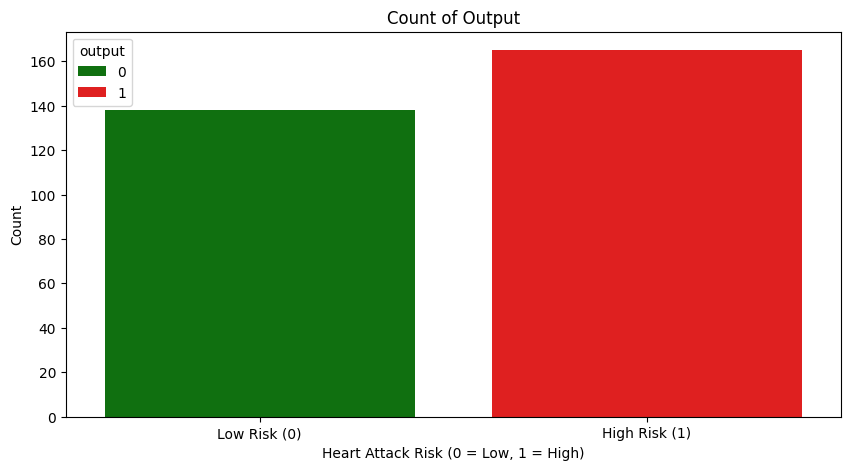

In [275]:
# Visualising heart attack risk levels
# Green = Good (Low Risk), Red = Bad (High Risk)
plt.figure(figsize=(10, 5))
# sb.countplot(data=dataset, x='output', palette=['green', 'red'])
sb.countplot(data=dataset, x='output', hue='output', palette=['green', 'red'], dodge=False)

plt.title("Count of Output")
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Low Risk (0)", "High Risk (1)"])
plt.show()

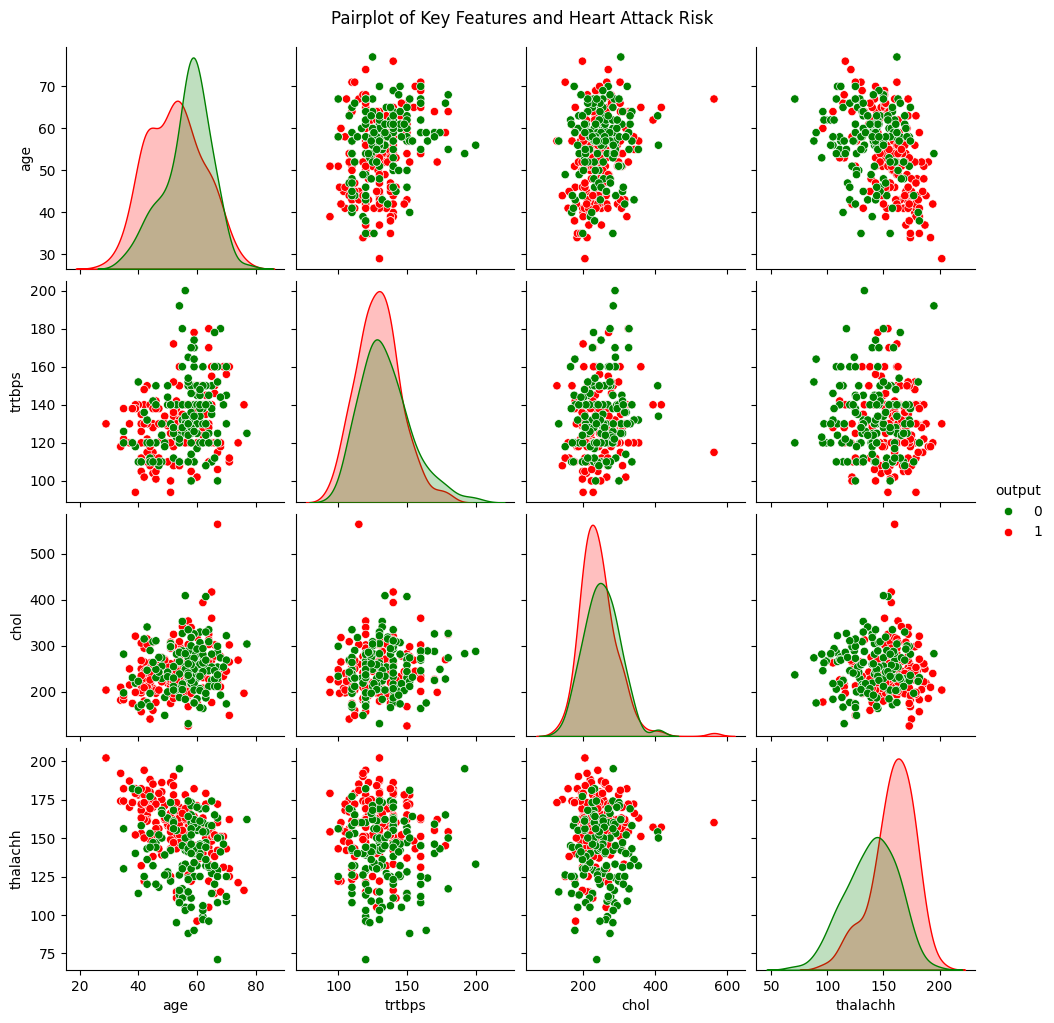

In [276]:
# sb.pairplot(dataset, hue='output')
# Pairplot: quick dive into feature relationships.
# Let's tone it down a bit by limiting to key features for clarity.

pairplot_features = ['age', 'trtbps', 'chol', 'thalachh', 'output']
sb.pairplot(dataset[pairplot_features], hue='output', palette=['green', 'red'])
plt.suptitle("Pairplot of Key Features and Heart Attack Risk", y=1.02)
plt.show()


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dictionary to store train-test splits for each combination
splits = {}

# Initialize variables to track the best accuracy, random state, and max depth
best_accuracy = 0
best_random_state = 0
best_max_depth = 0

# Loop through random states and max depths to find the best combination
for random_state in range(50):
    for max_depth in range(1, 20):
        # Create a unique key for the current combination
        split_key = f"split_{random_state}_{max_depth}"

        # Perform the train-test split and store in the dictionary
        splits[split_key] = train_test_split(X, Y, test_size=0.2, random_state=random_state)

        # Retrieve the split with unique variable names for safety
        X_train_loop, X_test_loop, y_train_loop, y_test_loop = splits[split_key]

        # Use a uniquely named classifier within the loop
        classifier_loop = DecisionTreeClassifier(max_depth=max_depth)
        classifier_loop.fit(X_train_loop, y_train_loop)

        # Make predictions and calculate accuracy
        predictions_loop = classifier_loop.predict(X_test_loop)
        accuracy_loop = accuracy_score(y_test_loop, predictions_loop)

        # Update the best parameters if current accuracy is higher
        if accuracy_loop > best_accuracy:
            best_accuracy = accuracy_loop
            best_random_state = random_state
            best_max_depth = max_depth

# Print the best combination found
print(f"Best Random State: {best_random_state} with Max Depth: {best_max_depth} and Accuracy: {best_accuracy}")
# Best Random State: 27 with Max Depth: 8 and Accuracy: 0.8852459016393442

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=best_random_state)

Best Random State: 27 with Max Depth: 6 and Accuracy: 0.9016393442622951


In [278]:
# from sklearn.model_selection import GridSearchCV

# # Use the best random state found above
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=best_random_state)

# # Define the parameter grid for max_depth
# param_grid = {
#     'max_depth': range(1, 15)
# }

# # Run GridSearchCV to find the best max_depth
# grid_search = GridSearchCV(
#     estimator=DecisionTreeClassifier(random_state=best_random_state),
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)

# # Print the results
# print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
# print(f"Test Accuracy: {test_accuracy}")


In [279]:
# classifier = DecisionTreeClassifier()
# classifier = DecisionTreeClassifier(max_depth=1)
# classifier = DecisionTreeClassifier(max_depth=2)
# classifier = DecisionTreeClassifier(max_depth=3)
# classifier = DecisionTreeClassifier(max_depth=4)
# classifier = DecisionTreeClassifier(max_depth=5)
# classifier = DecisionTreeClassifier(max_depth=6)
# classifier = DecisionTreeClassifier(max_depth=7)
# classifier = DecisionTreeClassifier(max_depth=8)
# classifier = DecisionTreeClassifier(max_depth=9)
# classifier = DecisionTreeClassifier(max_depth=10)

classifier = DecisionTreeClassifier(max_depth=best_max_depth)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=27)
# classifier = DecisionTreeClassifier(max_depth=17)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [280]:
# predicting
predictions = classifier.predict(X_test)

In [281]:
# Here are the predictions: 1s for high risk, 0s for low risk
# predictions

In [282]:
# Let's compare the model’s predictions with the actual outcomes from the test set
# y_test

In [283]:
# Import confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [284]:
# Generate the classification report to see precision, recall, and F1 scores
# Precision: How many of the predicted positives are truly positive
# Recall: How many of the actual positives were correctly identified
# F1-Score: A harmonic mean of Precision and Recall
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.87      0.76      0.81        34

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [285]:
# Printing the confusion matrix to evaluate model predictions.
# Think of it as a "who-got-it-right" table:
# - CM11: True Negatives  (TN) - Correctly identified low-risk patients.
# - CM12: False Positives (FP) - Predicted high-risk, but they're low-risk.
# - CM21: False Negatives (FN) - Predicted low-risk, but they're actually high-risk (*Critical!).
# - CM22: True Positives  (TP) - Correctly identified high-risk patients.
# NOTE: False negatives (FN) are more concerning for a heart condition dataset,
#        as missing a high-risk patient could have serious consequences.

print(confusion_matrix(y_test, predictions))

[[23  4]
 [ 8 26]]


In [286]:
# Normalize the confusion matrix to get proportions
conf_matrix_norm = confusion_matrix(y_test, predictions, normalize='true')
print("\nNormalised Confusion Matrix:")
print(conf_matrix_norm)


Normalised Confusion Matrix:
[[0.85185185 0.14814815]
 [0.23529412 0.76470588]]


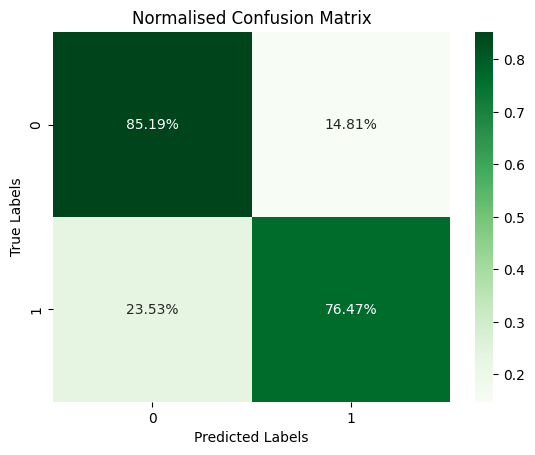

In [287]:
# Visualise the normalised confusion matrix as a heatmap
# This shows proportions instead of raw numbers, making it easier to interpret

sb.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Greens')
plt.title("Normalised Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

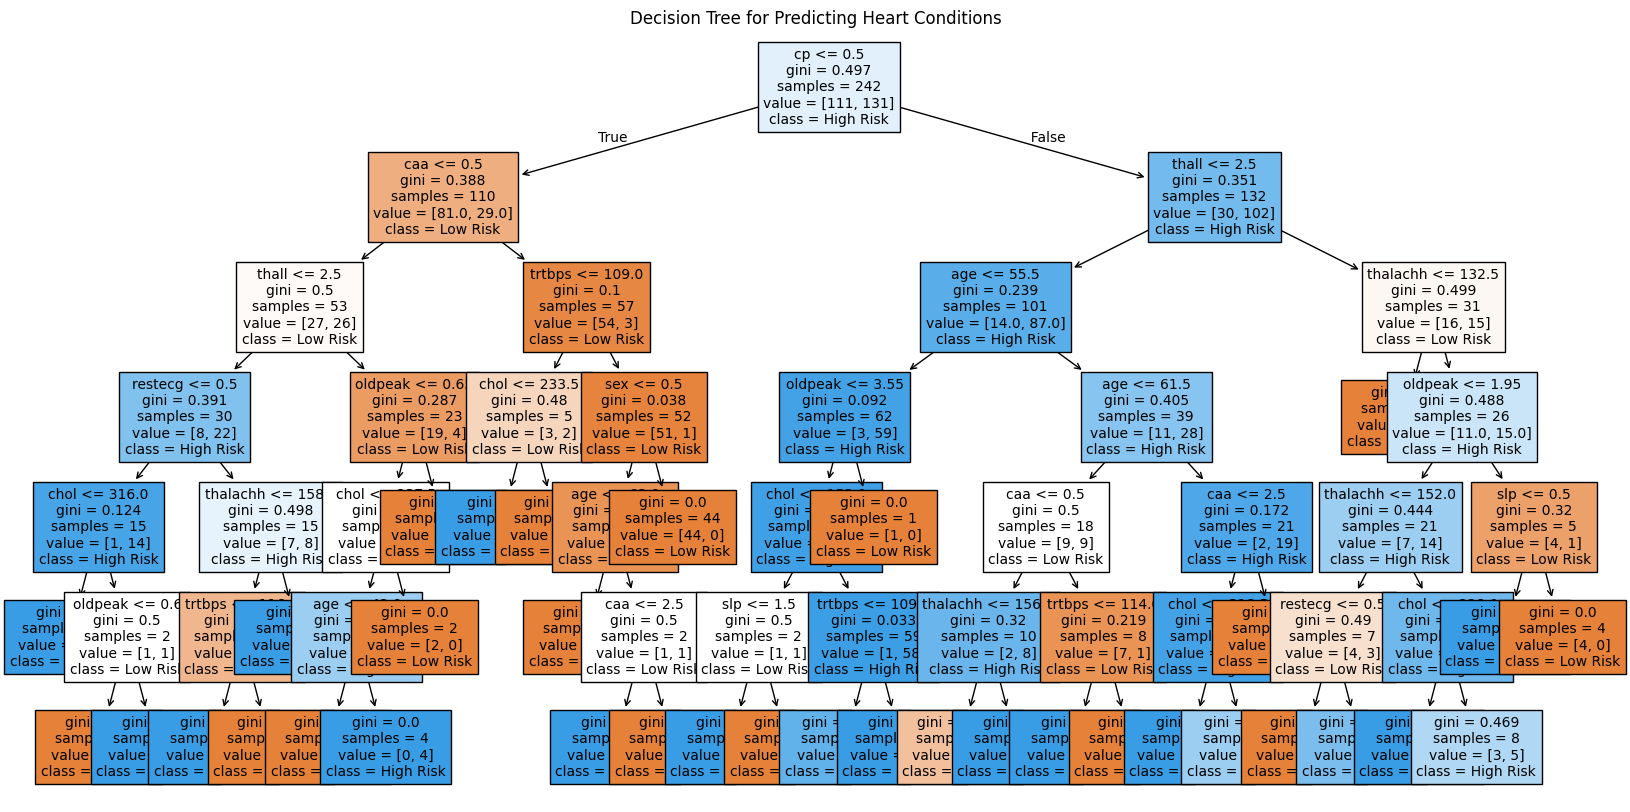

In [288]:
# Visualising the Decision Tree 🎄 using matplotlib
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    classifier,
    feature_names=feature_col_tree,
    class_names=['Low Risk', 'High Risk'],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree for Predicting Heart Conditions")
plt.show()
